# Fact or Fake?

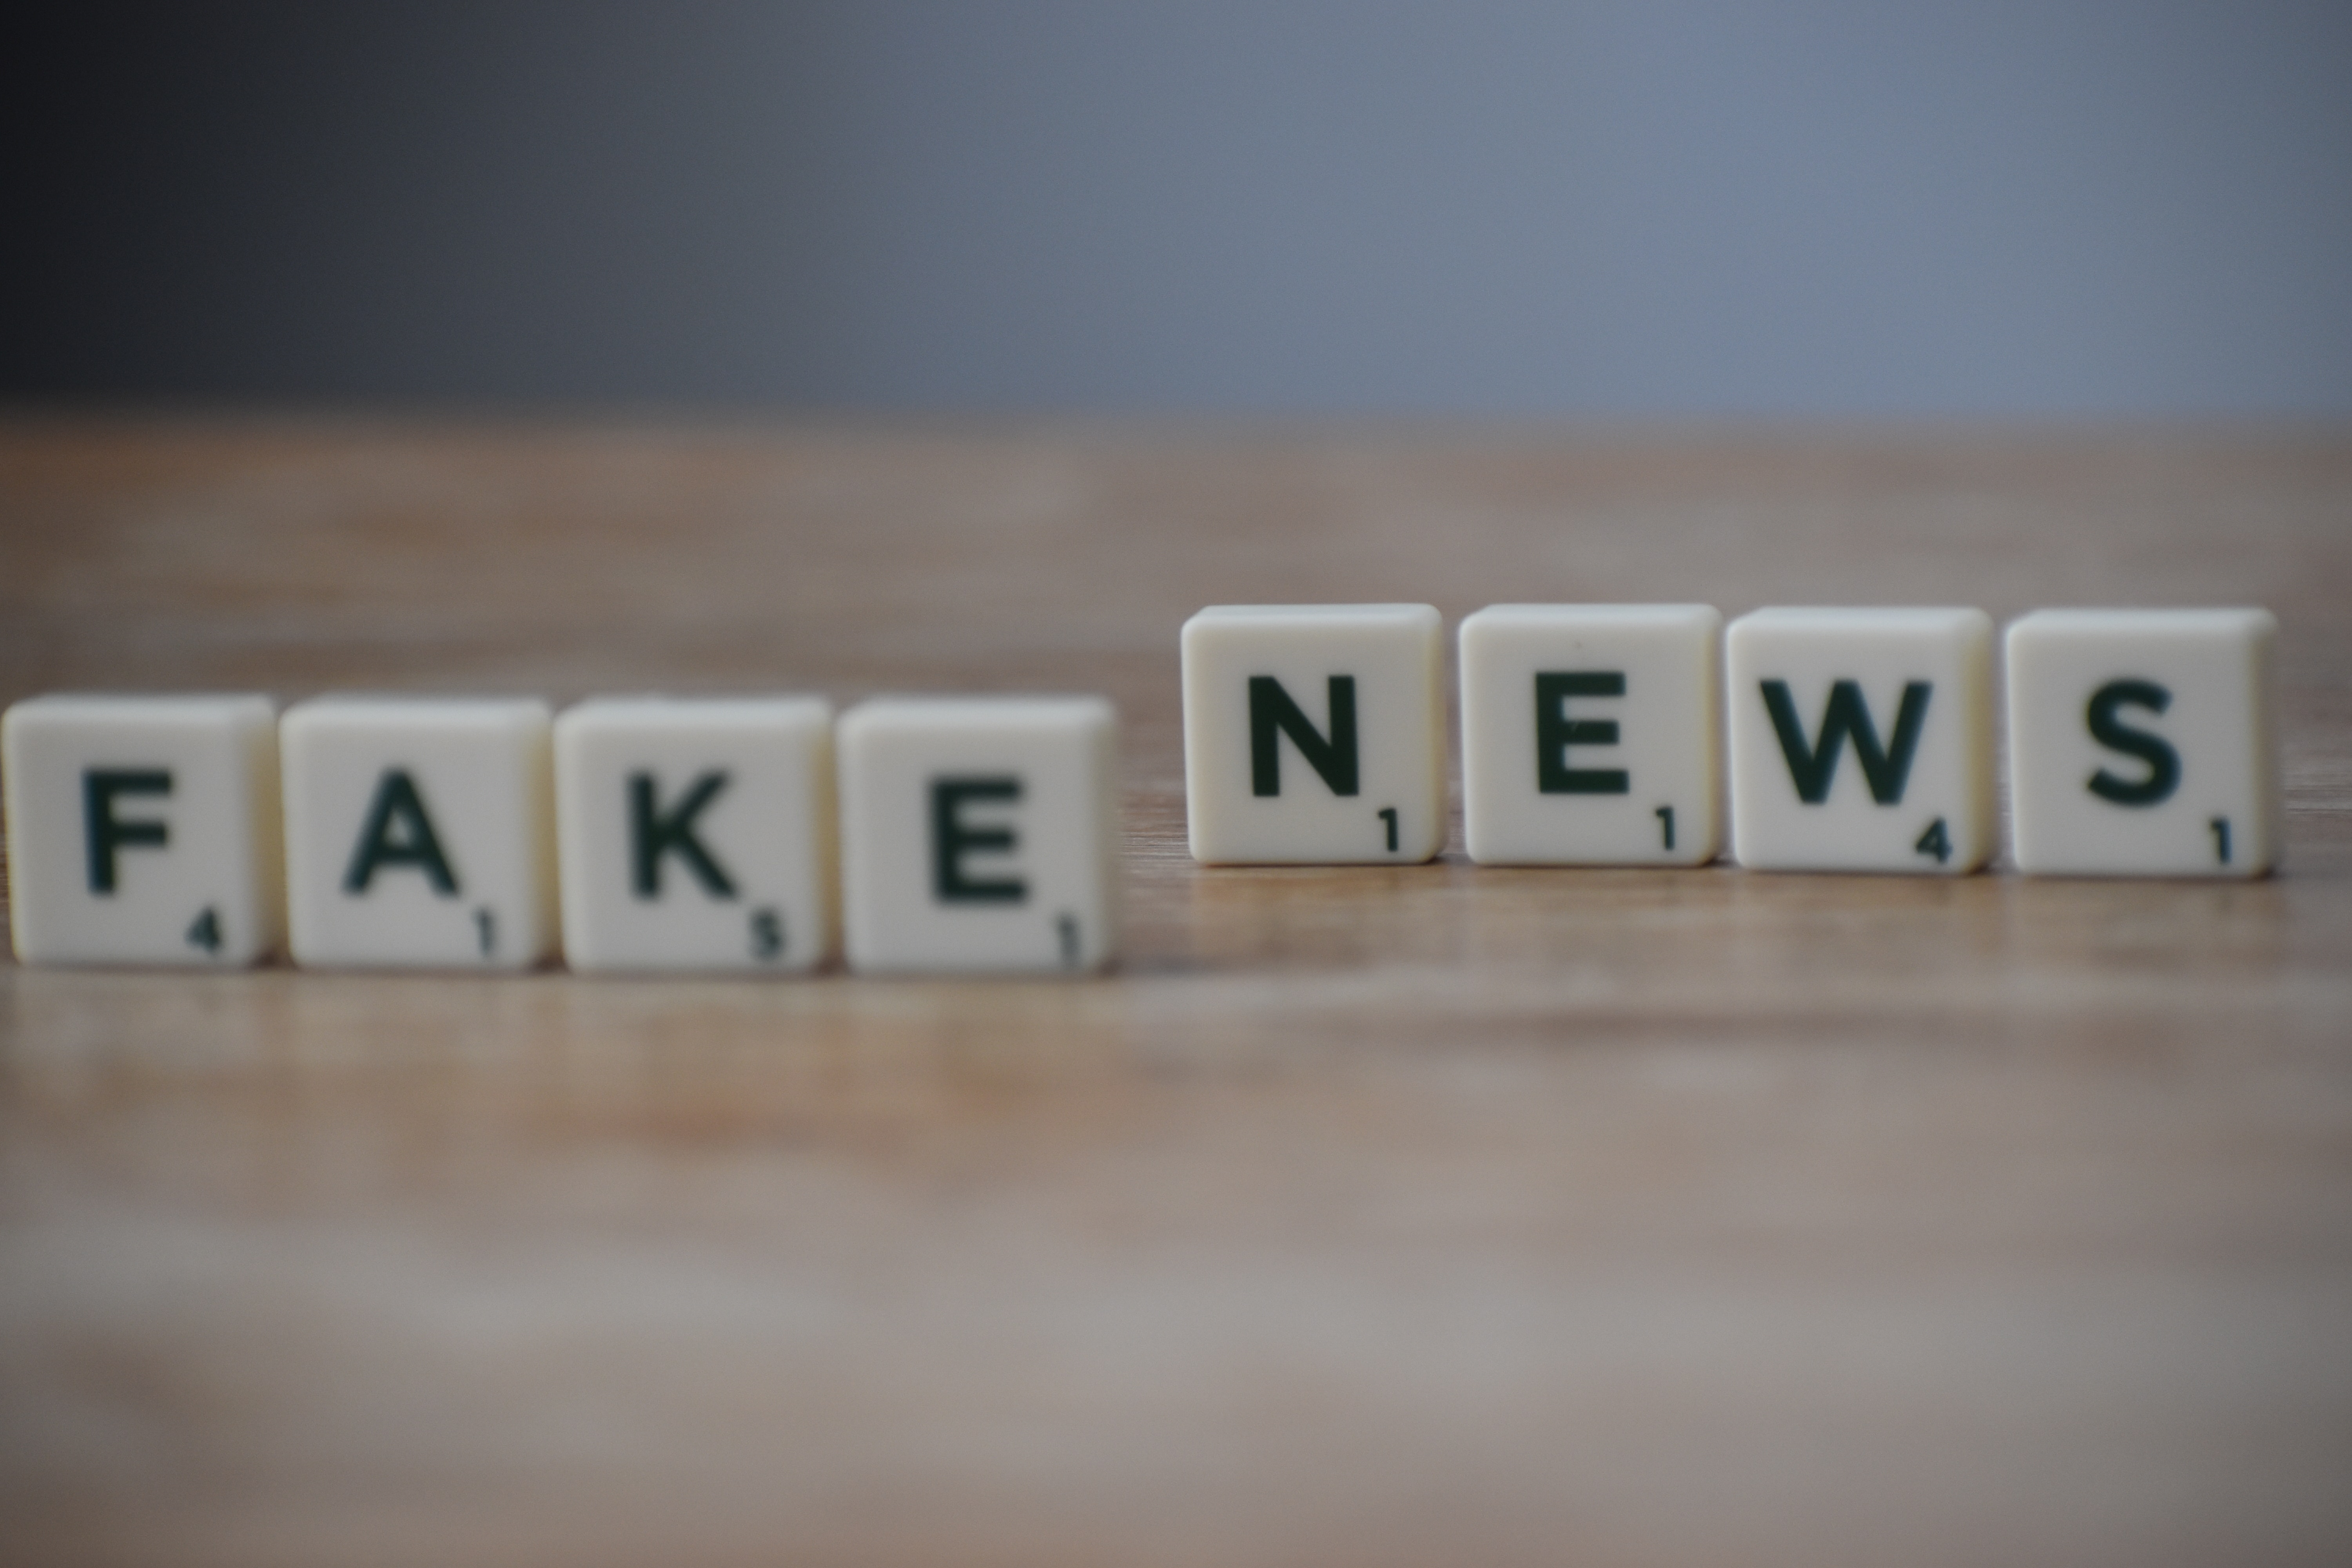

At least after the precidency of Donald Trump the world had heard about "Fake News" - although some misleading information may have been spread - the term captures a quite important issue - the spread of unconfirmed, in some cases even fictional "information" on real people, organisations, countries, etc.

The following codes tries solve the problem of detecting fake news via Deep Learning



Link to the used Dataset:

https://github.com/joolsa/fake_real_news_dataset


The Dataset was provided by George McIntire - a Data Scientist from Berkeley.

https://github.com/GeorgeMcIntire

    

## STEP 1: Preprocession


**Load the Data**
 - Load Data
 - Print Overview


In [1]:
import pandas as pd
df = pd.read_csv('fake_or_real_news.csv')

print(df)

      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter








**Beautify Input data**
 - Remove unneccessary columns
 - Rename columns



df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [2]:
df = df.drop(df.columns[[0]], axis=1)
df = df.drop(df.columns[[0]], axis=1)

df = df.rename(columns = {"v1":"type", "v2":"text"})
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


**Removing missing Values**
 - Checking the Shape
 - Removing any Missing Values
 

In [3]:
print(df.shape)
df = df.dropna(how="any", axis=1)
print(df.shape)


(6335, 2)
(6335, 2)


In [4]:
df.head().style

**Installing Spacy and loading a pretrained model**
 - Spacy is a powerful NLP library that can help us clean our texts
 - It work on a pretrained model that recognize parts of the natural language (like a noun)
 
 for more informations see: https://spacy.io/models/en

In [5]:
#!pip install spacy
#!python -m spacy download en_core_web_md

import spacy
nlp=spacy.load('en_core_web_md')

In [6]:
#!pip install inflect
import inflect
inflect = inflect.engine()

word = "bars"

word='bananas'
print("The plural of ", word, " is ", inflect.plural(word))
print("Is Word plural? ", word, " is ", inflect.singular_noun(word))

The plural of  bananas  is  banana
Is Word plural?  bananas  is  banana


In [7]:
#also import another stopword list - since usually one
#stopword list ist not enough

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk_stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Cleaning our text**
 1. Do Tokenization (splitting the sentence into sub elements) and part of speech tagging (detecting if token in noun word etc.)
 2. Convert all nouns to singular nouns (like bananas -> bananas)
 3. Do Lemmatization for all verbs (like was -> is)
 4. remove all punctuation
 5. removing stop words - (currently commented out because it deterioated the performance of the model later)

In [8]:
df["cleaned_text"]=""


d=0
c=""
for x in df["text"]:
    
    #step 1 do the tokenization
    tokenized_text = nlp(str(x).lstrip().rstrip())
    for token in tokenized_text:

        #step 1
        #use the part of speach tagging
        #only nouns should be singularized 
        if (token.tag_ == "NN" or token.tag_ == "NE"):
            
            
            #check if the noun is already singular
            #if so nothing will happen
            if inflect.singular_noun(str(token)) == False:
                c+=" "+str(token).lower()
            else:  
                
                #step 2
                #singularize a plural noun
                try:
                    singularized_text = inflect.plural(str(token).lower())
                    c+=" "+singularized_text
                    
                except IndexError:
                    print(str(token))
                    pass
        else:
            #step 3
            #if token is verb do lemmatization
            if token.pos_ == "VERB" or token.pos_ == "AUX":

                #do lemmatization also for verb 
                c+=" "+str(token.lemma_).lower()
                
            else:
                
                c+=" "+str(token).lower()               
            
    
    #store the results in the new table
    df["cleaned_text"].iloc[d]=c
    c=""
    d+=1
    
df.head(10).style

'S


**Removing stop words**

In [9]:




d=0
c=""
for x in df["cleaned_text"]:
    
    #step 1 do the tokenization
    tokenized_text = nlp(str(x).lstrip().rstrip())
    for token in tokenized_text:

        #step 4 
        #remove tokens that are recognized as punctuation or stopwords
        if token.is_punct == True or token.is_stop == True or str(token).lower() in nltk_stop_words:
            pass

        else:

            #step 5
            #remove all words with to less letters
            if len(str(token))<=2:
                pass

            else:               
                c+=" "+str(token).lower()
    
    #store the results in the new table
    df["cleaned_text"].iloc[d]=c
    c=""
    d+=1
    
df.head(10).style

In [10]:
if len("s")<=2:
    print("yes")

yes


## Step 2: Basic Analysis

**Distribution Analysis**
 - Plotting Categories
 

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['label'])

df['type_encoded'] = encoder.transform(df['label'])
df.head()

,text,label,cleaned_text,type_encoded
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journalism fellow ...,0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumble...,0
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,u.s secretary state john kerry monday stop pa...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king @kaydeeke november 2016 lesson to...,0
4,It's primary day in New York and front-runners...,REAL,primary day new york runners hillary clinton ...,1


Number of Real-News: 3164
Number of Fake-News: 3171


<AxesSubplot:>

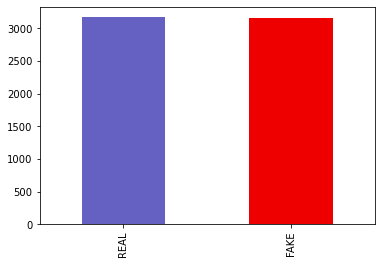

In [12]:
import matplotlib.pyplot as plt



print("Number of Real-News: {}\nNumber of Fake-News: {}".format(df['label'].value_counts()[1],df['label'].value_counts()[0]))
df['label'].value_counts().plot.bar(color=['#6461c2', '#ee0000'])



**Adding Text Length**
 - Calculating Text Length
 - Plotting Results with Distribution for each Class (Real News or Fake News)
 

In [13]:
df['length'] = df['text'].apply(lambda x: len(x.split(' ')))
df.head()

,text,label,cleaned_text,type_encoded,length
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journalism fellow ...,0,1298
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumble...,0,446
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,u.s secretary state john kerry monday stop pa...,1,423
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king @kaydeeke november 2016 lesson to...,0,404
4,It's primary day in New York and front-runners...,REAL,primary day new york runners hillary clinton ...,1,307


Text(0.5, 0, 'Message Length')

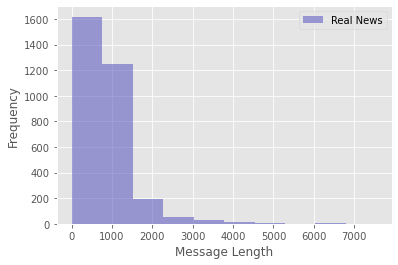

In [14]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(6, 4))

df[df.label=='REAL'].length.plot(
    kind='hist', color='#6461c2',
    label='Real News', alpha=0.6)
#df[df.label=='FAKE'].length.plot(
#    kind='hist', color='#ee0000', 
#    label='Fake New', alpha=0.6)

plt.legend()
plt.xlabel("Message Length")


Text(0.5, 0, 'Message Length')

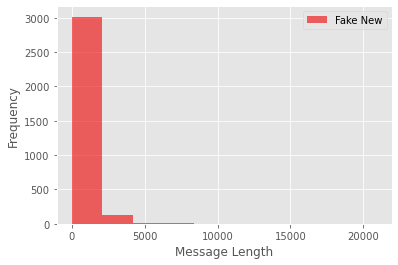

In [15]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(6, 4))

#df[df.label=='REAL'].length.plot(
#    kind='hist', color='#6461c2',
#    label='Real News', alpha=0.6)
df[df.label=='FAKE'].length.plot(
    kind='hist', color='#ee0000', 
    label='Fake New', alpha=0.6)

plt.legend()
plt.xlabel("Message Length")


In [16]:
#fake news tend to be shorter

**Creating a Word Cloud**
 - Calculating most frequent words per category
 - Graphically representing them

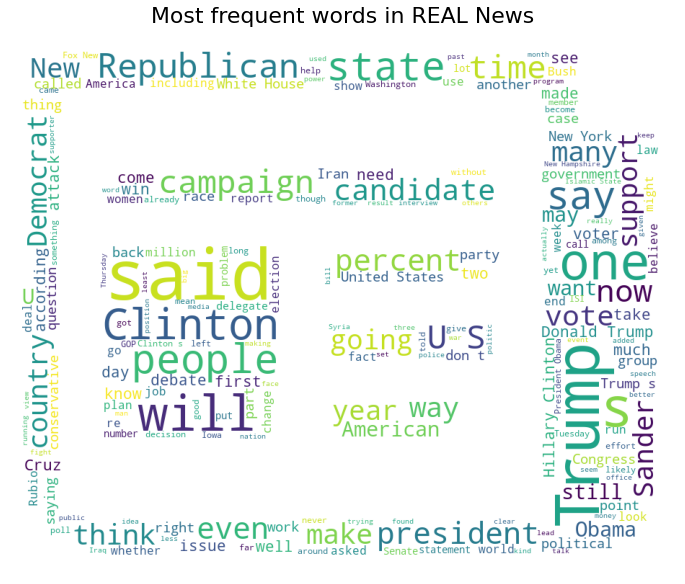

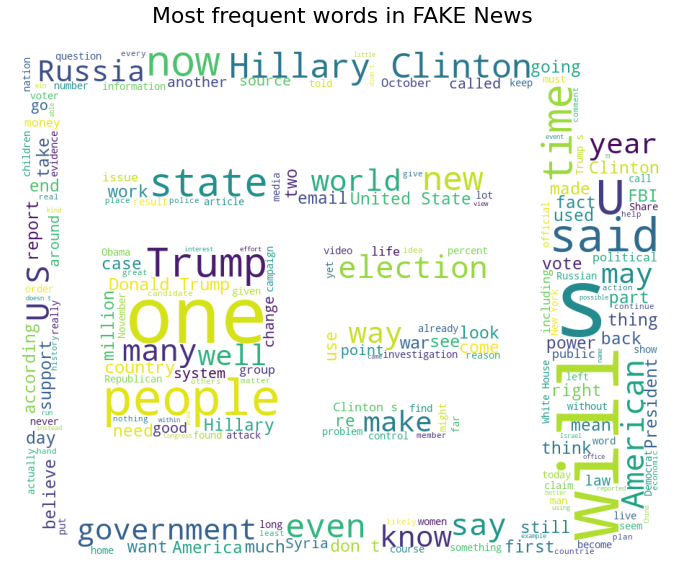

In [17]:
from PIL import Image
!pip install wordcloud
from wordcloud import WordCloud
import numpy as np
sms_picture = np.array(Image.open('news.jpg'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=sms_picture,
)
wc.generate(' '.join(text for text in df.loc[df['label'] == 'REAL', 'text']))
plt.figure(figsize=(18,10))
plt.title('Most frequent words in REAL News', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=sms_picture,
)
wc.generate(' '.join(text for text in df.loc[df['label'] == 'FAKE', 'text']))
plt.figure(figsize=(18,10))
plt.title('Most frequent words in FAKE News', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

## Step 3: Traditional Methods
## Step 3.1: N-Gram

In [18]:
#n grams are a combinations of n words in our specific case
#below you can see the possible cominations of 2 words (without changing the ordering of the words)

from nltk import ngrams
sentence = 'this is a foo bar sentences and i '

n = 2
sevengrams = ngrams(sentence.split(), n)

for grams in sevengrams:
    print(grams)

('this', 'is')
('is', 'a')
('a', 'foo')
('foo', 'bar')
('bar', 'sentences')
('sentences', 'and')
('and', 'i')


In [19]:
def create_ngrams(input_text):
    #onegrams = input_list
    bigrams = [" ".join(t) for t in list(zip(input_text, input_text[1:]))]
    trigrams = [" ".join(t) for t in list(zip(input_text, input_text[1:], input_text[2:]))]
    return bigrams + trigrams


df["grams"] = df["cleaned_text"].apply(lambda x:create_ngrams(x.split()))
df[["grams"]].head()

,grams
0,"[daniel greenfield, greenfield shillman, shill..."
1,"[google pinterest, pinterest digg, digg linked..."
2,"[u.s secretary, secretary state, state john, j..."
3,"[kaydee king, king @kaydeeke, @kaydeeke novemb..."
4,"[primary day, day new, new york, york runners,..."


In [20]:
#seeing the most common 2 or 3 word comibnations in fake news
import collections
def count_words(input_text):
    cnt = collections.Counter()
    for row in input_text:
        for word in row:
            cnt[word] += 1
    return cnt

count_words(df[(df.label == "FAKE")]["grams"]).most_common(10)



[('hillary clinton', 2424),
 ('donald trump', 1755),
 ('united states', 1436),
 ('october 2016', 912),
 ('white house', 734),
 ('new york', 706),
 ('november 2016', 520),
 ('clinton campaign', 505),
 ('clinton foundation', 437),
 ('secretary state', 406)]

In [21]:
#seeing the most common 2 or 3 word comibnations in real news
import collections
def count_words(input_text):
    cnt = collections.Counter()
    for row in input_text:
        for word in row:
            cnt[word] += 1
    return cnt

count_words(df[(df.label == "REAL")]["grams"]).most_common(10)


[('donald trump', 2061),
 ('hillary clinton', 1846),
 ('white house', 1626),
 ('united states', 1607),
 ('new york', 1523),
 ('fox news', 1061),
 ('president obama', 991),
 ('new hampshire', 941),
 ('islamic state', 826),
 ('secretary state', 779)]

## Step 3.2:Bag of Words & Naive Bayes


 - Create a word matrix (needed for traing the model)
 - Create test and training set
 - Build model
 - Get accuracy

In [89]:
# creating the feature matrix 
#define x and y axis of the matrix we build later
X = df['cleaned_text']
Y = df['type_encoded']
print(len(X), len(Y))

from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(X).toarray()


# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(X)

6335 6335
[[0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
# load a Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()


import time
start_time = time.time()
classifier.fit(X_train, Y_train)
print("--- Training the model took %s seconds ---" % (time.time() - start_time))

# predict the class
Y_pred = classifier.predict(X_test)

# get the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

print("The model had an accurary of " + str(accuracy))

--- Training the model took 0.06837296485900879 seconds ---
The model had an accurary of 0.8200473559589582


### Build a Confusion Matrix

Confusion matrix, without normalization
[[597  50]
 [178 442]]
Normalized confusion matrix
[[597  50]
 [178 442]]


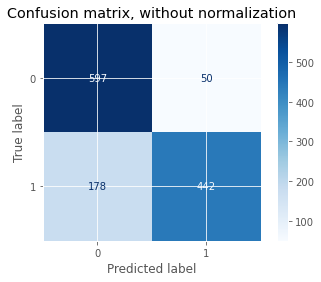

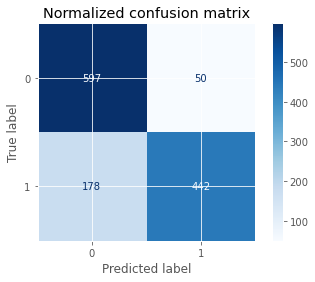

In [58]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


## Step 4: Deep Learning
## Step 4.1: LSTM Model

In [95]:
#importing the necessary data

#!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split


**Load Target Variable \+ Add Encoding**
 - will be used for further analysis

In [96]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['label'])

df['type_encoded'] = encoder.transform(df['label'])
df.head()

,text,label,cleaned_text,type_encoded,length,grams
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journalism fellow ...,0,1298,"[daniel greenfield, greenfield shillman, shill..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumble...,0,446,"[google pinterest, pinterest digg, digg linked..."
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,u.s secretary state john kerry monday stop pa...,1,423,"[u.s secretary, secretary state, state john, j..."
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king @kaydeeke november 2016 lesson to...,0,404,"[kaydee king, king @kaydeeke, @kaydeeke novemb..."
4,It's primary day in New York and front-runners...,REAL,primary day new york runners hillary clinton ...,1,307,"[primary day, day new, new york, york runners,..."


**Load Predictor Variable + Add Vectorization**
 - Create a word matrix (needed for traing the model)
 - Create test and training set (In this case a split of 80 to 20)

In [97]:
#define x and y axis of the matrix we build later
X = df['cleaned_text']
Y = df['type_encoded']
print(len(X), len(Y))

Y = encoder.fit_transform(Y)
Y = Y.reshape(-1,1)

#split into training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.2)

#initialize vectorization
max_words = 10000
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)



6335 6335


**Defining Model function**
 - setting now a up a different model with more layer
 - with the target of achieving a better accuracy in the end

In [98]:

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words, 50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [99]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 200)]             0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

**Training the model**

 - a Training-Validation Split of 80-20
 - 7 different Epochs
 - and an Early Stop - Condition - which should stop the model 
 compuatation when no significant improvment can be achieved in the next iteration

In [100]:


#training_data = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=7, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0000000001)])
#was commented out because in oder to visuzlize the training process better
import time
start_time = time.time()
training_data = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=7, validation_split=0.2)
print("--- Training the model took %s seconds ---" % (time.time() - start_time))

Epoch 1/7
32/32 [==============================] - 6s 164ms/step - loss: 0.5687 - accuracy: 0.7331 - val_loss: 0.4051 - val_accuracy: 0.8432
Epoch 2/7
32/32 [==============================] - 7s 230ms/step - loss: 0.2246 - accuracy: 0.9213 - val_loss: 0.2656 - val_accuracy: 0.8905
Epoch 3/7
32/32 [==============================] - 7s 235ms/step - loss: 0.1231 - accuracy: 0.9620 - val_loss: 0.3621 - val_accuracy: 0.9053
Epoch 4/7
32/32 [==============================] - 7s 234ms/step - loss: 0.0666 - accuracy: 0.9800 - val_loss: 0.4314 - val_accuracy: 0.8955
Epoch 5/7
32/32 [==============================] - 7s 231ms/step - loss: 0.0540 - accuracy: 0.9884 - val_loss: 0.3825 - val_accuracy: 0.8876
Epoch 6/7
32/32 [==============================] - 7s 226ms/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.5176 - val_accuracy: 0.8925
Epoch 7/7
32/32 [==============================] - 7s 229ms/step - loss: 0.0090 - accuracy: 0.9963 - val_loss: 0.5783 - val_accuracy: 0.8925
--- Training 

**Visualizing the Training Progress**
 - Visualizing how the model performed on training and validation set 
 - over the course of the learning

In [101]:
import matplotlib.pyplot as plt

def plot_training(training_data,train,validation):
    plt.style.use('ggplot')
    plt.plot(training_data.history[train], color='#6461c2')
    plt.plot(training_data.history[validation], color='#ee0000')
    plt.title('Learning Progress')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

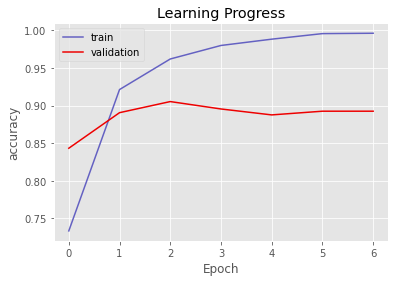

In [102]:
plot_training(training_data, 'accuracy', 'val_accuracy')

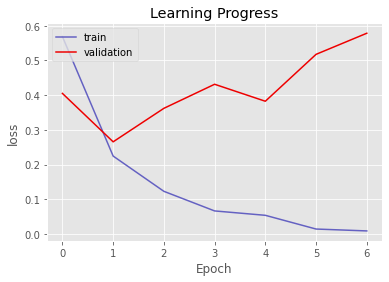

In [103]:
plot_training(training_data, 'loss', 'val_loss')

## Step 4.2 Sequential - GRU

In [40]:

from tensorflow.keras.layers import GRU

def Sequential():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words, 50,input_length=max_len)(inputs)
    layer = GRU(256, return_sequences=True)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    
    model = Model(inputs=inputs,outputs=layer)
    return model

In [41]:
model = Sequential()
model.summary()
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 200)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
gru_1 (GRU)                  (None, 200, 256)          236544    
_________________________________________________________________
out_layer (Dense)            (None, 200, 1)            257       
_________________________________________________________________
activation_3 (Activation)    (None, 200, 1)            0         
Total params: 736,801
Trainable params: 736,801
Non-trainable params: 0
_________________________________________________________________


**Training the model**

 - a Training-Validation Split of 80-20
 - 7 different Epochs

In [42]:
import time
start_time = time.time()
training_data = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=7, validation_split=0.2)
print("--- Training the model took %s seconds ---" % (time.time() - start_time))

Epoch 1/7
32/32 [==============================] - 24s 738ms/step - loss: 0.2266 - accuracy: 0.6287 - val_loss: 0.1846 - val_accuracy: 0.7742
Epoch 2/7
32/32 [==============================] - 27s 834ms/step - loss: 0.1392 - accuracy: 0.8242 - val_loss: 0.1552 - val_accuracy: 0.7969
Epoch 3/7
32/32 [==============================] - 26s 809ms/step - loss: 0.1055 - accuracy: 0.8716 - val_loss: 0.1888 - val_accuracy: 0.7818
Epoch 4/7
32/32 [==============================] - 24s 747ms/step - loss: 0.1386 - accuracy: 0.8468 - val_loss: 0.1657 - val_accuracy: 0.7591
Epoch 5/7
32/32 [==============================] - 24s 757ms/step - loss: 0.1770 - accuracy: 0.7972 - val_loss: 0.2911 - val_accuracy: 0.6894
Epoch 6/7
32/32 [==============================] - 24s 754ms/step - loss: 0.2276 - accuracy: 0.7542 - val_loss: 0.2657 - val_accuracy: 0.7062
Epoch 7/7
32/32 [==============================] - 24s 764ms/step - loss: 0.1914 - accuracy: 0.7936 - val_loss: 0.2619 - val_accuracy: 0.7084
--- 17

**Visualizing the Training Progress**
 - Visualizing how the model performed on training and validation set 
 - over the course of the learning

In [36]:
import matplotlib.pyplot as plt

def plot_training(training_data,train,validation):
    plt.style.use('ggplot')
    plt.plot(training_data.history[train], color='#6461c2')
    plt.plot(training_data.history[validation], color='#ee0000')
    plt.title('Learning Progress')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

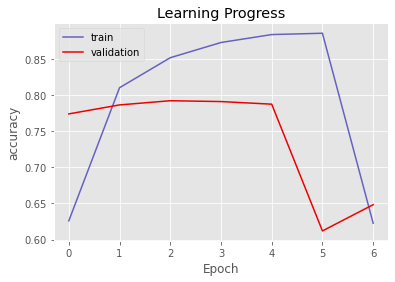

In [37]:
plot_training(training_data, 'accuracy', 'val_accuracy')

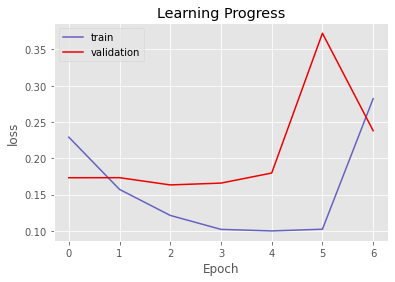

In [38]:
plot_training(training_data, 'loss', 'val_loss')